Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal
We are required to model the demand for hiring bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 500)
from sklearn.model_selection import train_test_split

In [2]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/01/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/01/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/01/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/01/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/01/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#check the columns of data
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
# Data Observations 1 Dataset has 730 rows and 16 columns 2 four columns are float type, one is date time type and other are integer type

In [7]:
#details of numeric data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# datatypes of data
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

###### DATA CLEANING

Checking missing/null values 2. drop the column, if there are not useful 3. data preparation: converting column to categorical variable
4.Univariate analysis 5. Handling outliers 6. EDA 7.corelation analysis

In [9]:
#check the Null value 
round(bike.isnull().sum()/len(bike)*100,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
# drop the coulmn, if there are not useful
#instant column has only index value. lets drop this.
bike =bike.drop(columns=['instant'])

In [11]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [12]:
#casual and registered variable: #since main goal is to predict the total count. So, we can drop these variables,
#bike =bike.drop(columns=['casual'])
#bike =bike.drop(columns=['registered'])
bike = bike.drop(columns=['casual', 'registered','dteday'])

### Data preparation: converting column to categorical variable

In [13]:
#variable dteday this column has date. Since we already have month and year column in dataset. lets extract the date and rename column to date
#drived column: "date" extract date and rename it to date


In [14]:
#bike['dteday'] =bike['dteday'].apply(lambda x: x.split() if pd.notna(x) else x)
#bike = bike.rename(columns={'dteday': 'date'})

In [15]:
#Data Preparation: From Problem statement these data preparation steps are mentioned: *converting variables 'weathersit' and 'season' to specific string value as mentioned in data dictionary. *dont drop yr column.
# weathersit variable
bike.weathersit.describe()


count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

#Weathersit variable: + weathersit : - 1: Clear, Few clouds, Partly cloudy, Partly cloudy - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog In column,mapping will be like 1 clear 2 mist 3 light 4

In [16]:
bike['weathersit'] = bike['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [17]:
# season variable
bike.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [18]:
# season variable as mentioned in data dictionary season is categorical variable and map like season : season (1:spring, 2:summer, 3:fall, 4:winter) map this column according to this

In [19]:
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [20]:
#converting weekday column
bike['weekday']=bike['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [21]:
# converting month column
bike['mnth']=bike['mnth'].map({1: 'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})

In [22]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [23]:
#bike.convert_objects(convert_numeric=True)

In [24]:
bike.shape

(730, 12)

Comment: After data cleaning, data set has 13 columns and 730 rows

###### Univariate analysis

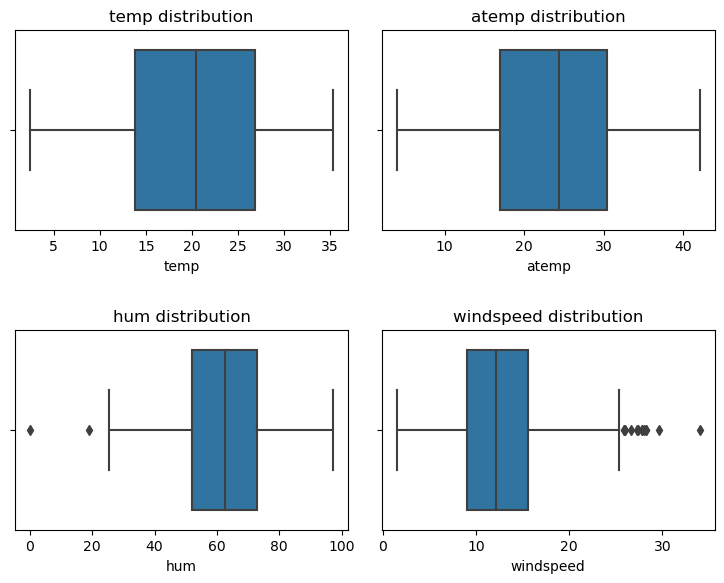

In [25]:
# analysis of numeric variables and plot the box plot

#boxplots
bike_num_col=['temp','atemp','hum','windspeed']
plt.figure(figsize=(10, 10))
i=1
for col in bike_num_col:
    plt.subplot(2,2,i)
    sns.boxplot(data=bike, x=col)
    plt.title(col+" distribution")
    i=i+1
plt.subplots_adjust(left=0.2,bottom=0.5,right=0.9,top=1,wspace=0.1, hspace=0.5)
plt.show()


Observations: 1.Temp variable: range of temp variable seems to be valid and there are no outliers. 2.atemp variable: range of atemp variable also seems to be valid and there are no outliers. 3.hum variable: two data points one is 0 and other one is 20 seems to be outliers. analyse these points in next step. 4.windspeed variable: range of atemp variable also seems to be valid and there is no need to drop any instance. 5.casual and registered: range of atemp variable also seems to be valid and there is no need to drop any instance.

###### Handling outliers values

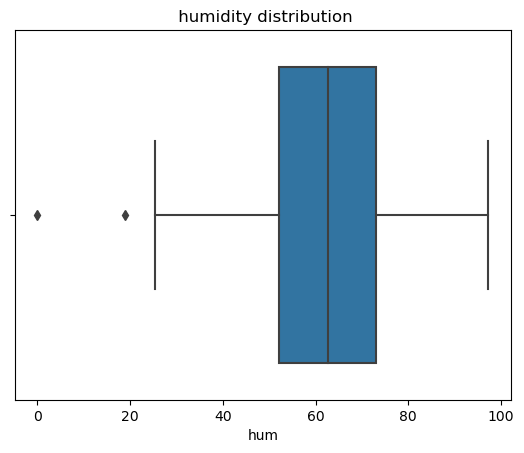

In [26]:
# box plot of humidity variable:
sns.boxplot(data=bike, x='hum')
plt.title(" humidity distribution")
plt.show()

In [27]:
#checking rows where humidity is zero.
bike[bike['hum'] == 0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
68,spring,0,march,0,Thursday,1,light,15.952731,19.2834,0.0,17.545759,623


In [28]:
 # check humidity value of nearby rows.
bike[(bike.index < (68+10)) & (bike.index > (68-10))].hum

59    53.5000
60    44.9583
61    31.8333
62    61.0417
63    78.9167
64    94.8261
65    55.1304
66    42.0833
67    77.5417
68     0.0000
69    64.9565
70    59.4583
71    52.7391
72    49.6957
73    65.5652
74    77.6522
75    60.2917
76    52.5217
77    37.9167
Name: hum, dtype: float64

#it is clear that humidity value zero is not possible and this could be typo or data was not measured correctly. 
#impute the mean value here 
bike['hum']=bike['hum'].replace(0,bike.hum.mean())

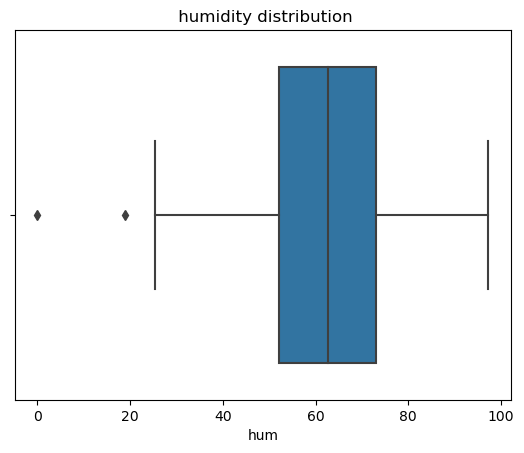

In [29]:
# recheking umidity value by boxplot
sns.boxplot(data=bike, x='hum')
plt.title(" humidity distribution")
plt.show()

#we imputed mean value in humidity column. there is no zero values now in humidity column

###### EDA
Check linear relation of numeric variable: EDA of numeric variables: plot pairplot of numeric variable

In [30]:
bike_num_col=['temp','atemp','hum','windspeed','cnt']

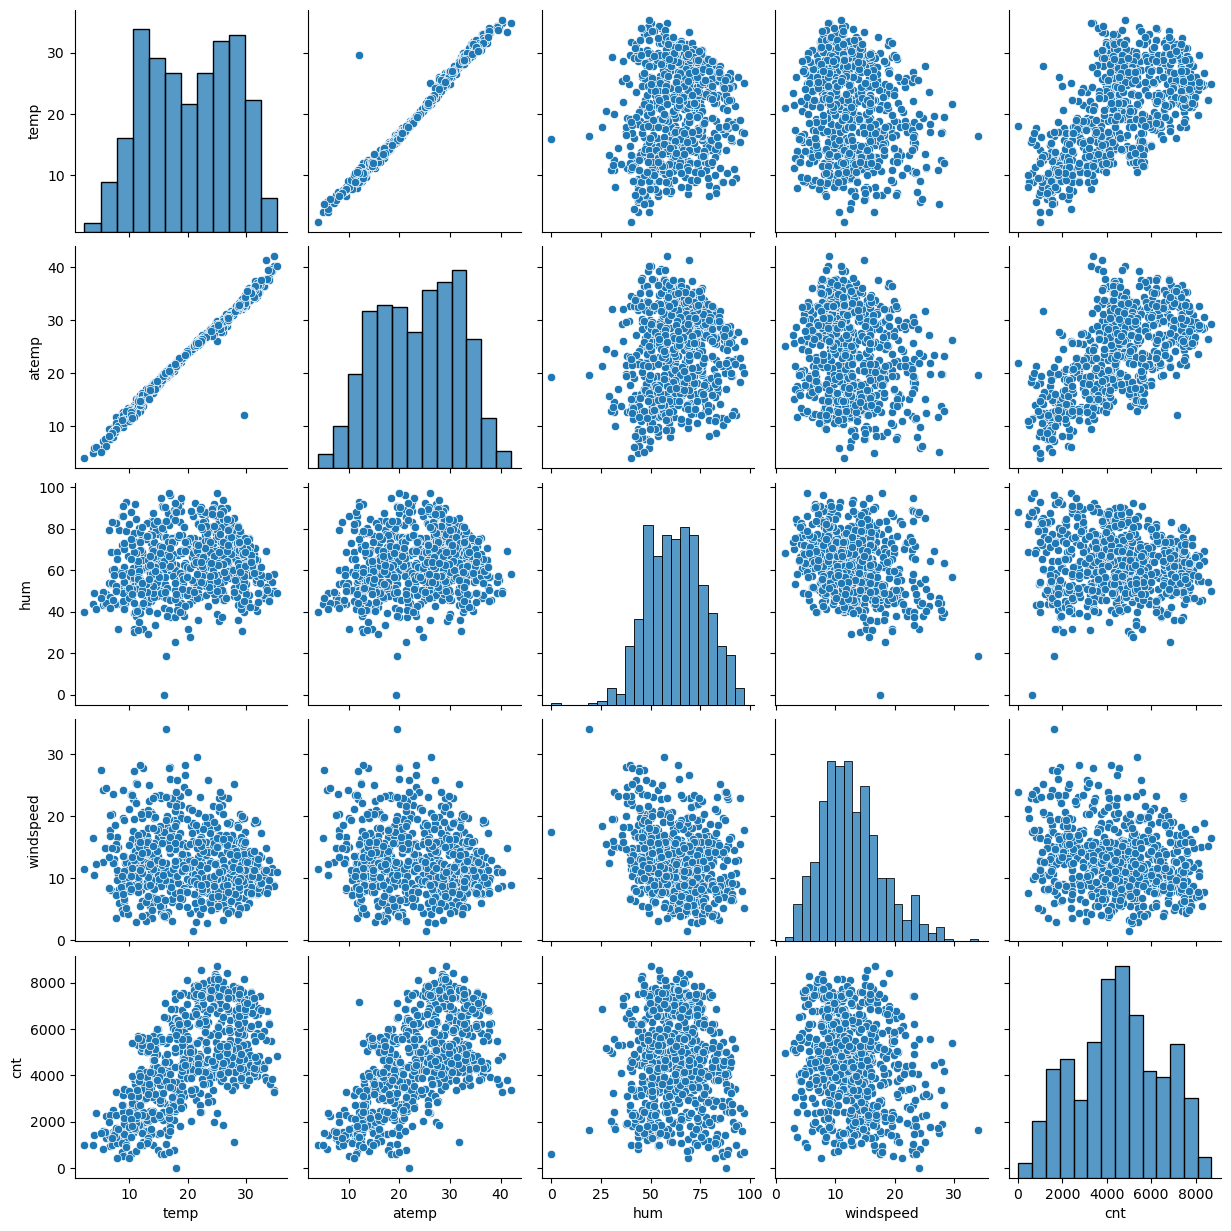

In [31]:
sns.pairplot(bike,vars=bike_num_col)
plt.show()

Observations: 1 temp and atemp variable have correlation with count target variable. 2 temp and atemp variable are also highly correlated.

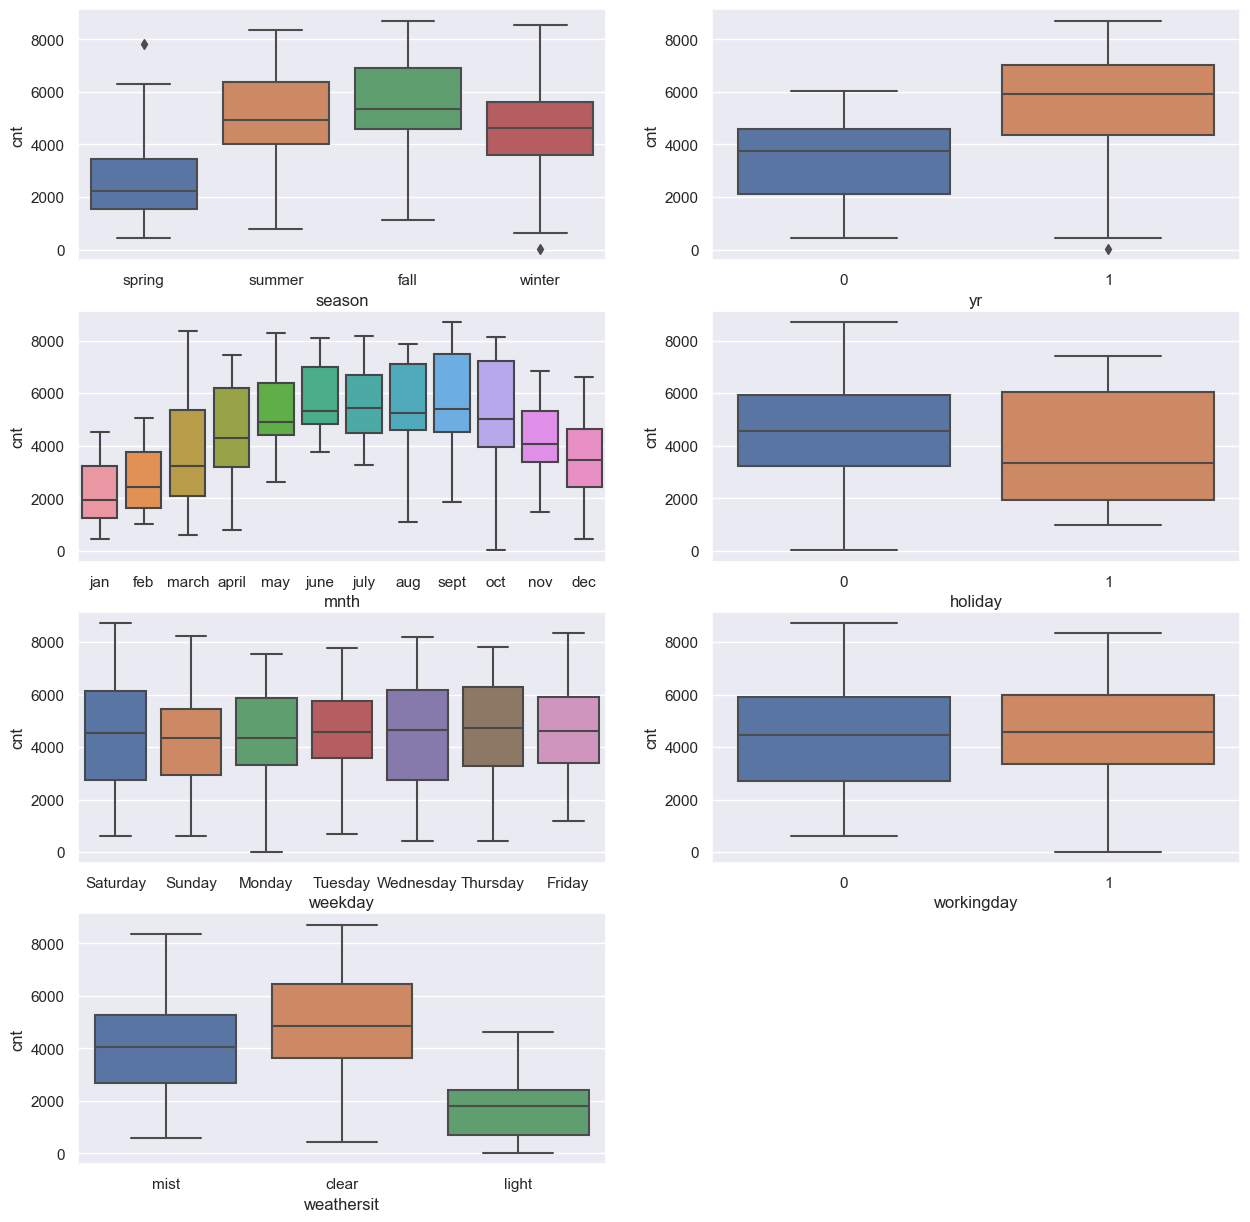

In [32]:
# Boxplot of categorical variables
bike_cat_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
sns.set(style="darkgrid")
i=1
for col in bike_cat_col:
    plt.subplot(4,2,i)
    sns.boxplot(data=bike, x=col, y='cnt')
    i=i+1
plt.show()

Observations: 1.Season: Fall season has the highest demand. 2.year: bike demand has increased from 2018 to 2019. 3.month: bike demand increases from Jan to sept and after that demand start dropping and dec month has least bike demand. 4.holiday: bike demand decreases during holiday time. 5.weekday: there is no particular pattern. 6.working day: on workingday, bike demand is little high. 7.weathersit: when weathersit is clear, bike demand is high.

###### CORRELATION ANALYSIS

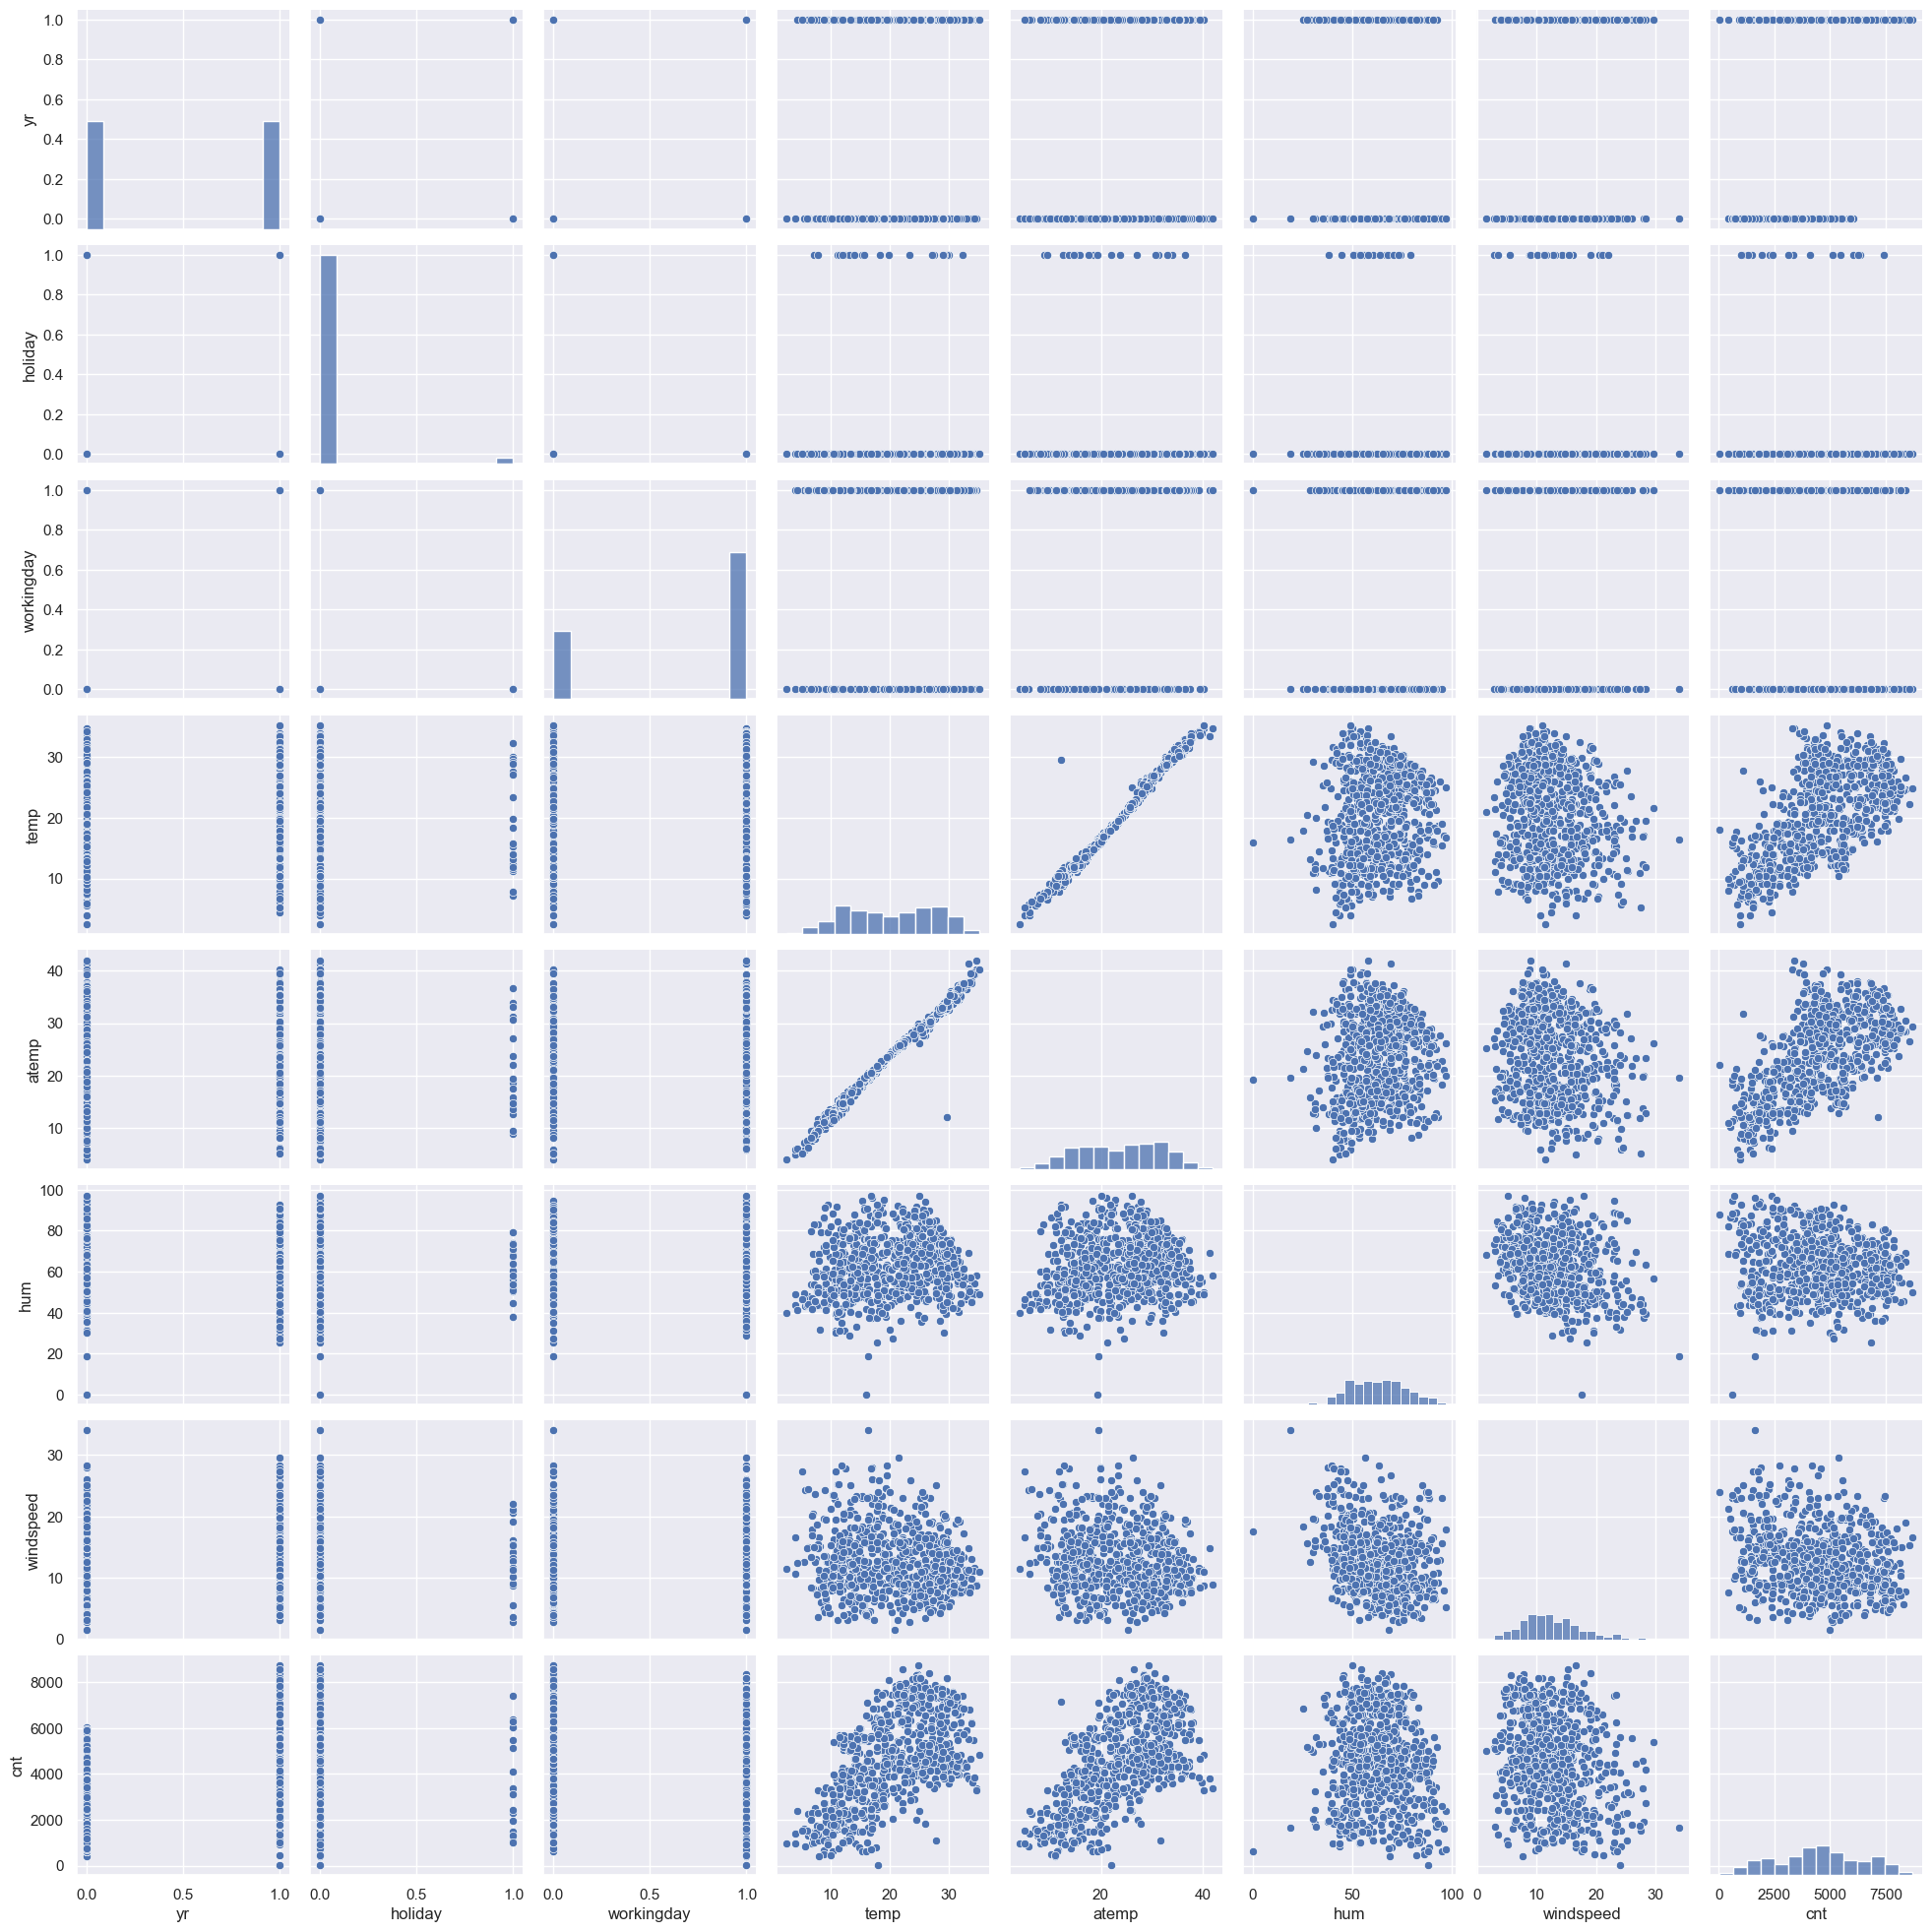

In [33]:
# plot the pairplot of the dataset
sns.pairplot(bike)
plt.show()

observations: 1 temp and atemp variable have correlation with count target variable. 2 temp and atemp variable are also highly correlated. 3 target variable has linear relationship with other variable.

In [34]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


##### Linear Regression data preparation

Linear Regression data preparation: 1) create dummy variable 2) train and test split 3) variable scaling normalization 4) define target column and feature columns

create dummy variable

In [35]:
# creating dummy variable for categorical variable:
category_col = ['mnth', 'season', 'weekday', 'weathersit']
dummy_col = pd.get_dummies(bike[category_col], drop_first=True)
dummy_col.head(10)

,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
5,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
7,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
8,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False


In [36]:
#  concatenate  it with dataset 
bike_new = pd.concat([bike,dummy_col], axis=1)
bike_new = bike_new.drop(columns=category_col)

In [37]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   mnth_aug           730 non-null    bool   
 9   mnth_dec           730 non-null    bool   
 10  mnth_feb           730 non-null    bool   
 11  mnth_jan           730 non-null    bool   
 12  mnth_july          730 non-null    bool   
 13  mnth_june          730 non-null    bool   
 14  mnth_march         730 non-null    bool   
 15  mnth_may           730 non-null    bool   
 16  mnth_nov           730 non

 train and test split

In [38]:
#Train Test split of dataset in 70:30 ratio
df_train, df_test = train_test_split(bike_new, test_size=0.3, random_state=100)

In [39]:
print("shape of traing data", df_train.shape)
print("shape of test data", df_test.shape)

shape of traing data (511, 30)
shape of test data (219, 30)


feature scaling and normalization

In [40]:
scaler = MinMaxScaler()

In [41]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
#Inspect stats fro Training set after scaling
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.514186
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.224737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.356765
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.519673
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.688737
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_march,mnth_may,mnth_nov,mnth_oct,mnth_sept,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_light,weathersit_mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True


define target column and feature columns

In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

Iterative model process

RFE : build linear regression model for RFE using sklearn 2) build a model using selected features

In [45]:
# a Linear Regression model for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
#Selecting 15 features using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [47]:
rfe_df = pd.DataFrame({'feature': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,feature,Select Status,Ranking
0,yr,True,1
23,weekday_Sunday,True,1
22,weekday_Saturday,True,1
20,season_winter,True,1
19,season_summer,True,1
17,mnth_sept,True,1
27,weathersit_light,True,1
10,mnth_jan,True,1
28,weathersit_mist,True,1
7,mnth_aug,True,1


 build mode

In [50]:
#VIF function 
def print_vif(cols):
    df1 = X_train[cols]
    vif_df = pd.DataFrame()
    vif_df['Features'] = df1.columns
    vif_df['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'],2)
    #return vif_df
    print(vif_df.sort_values(by='VIF',ascending=False))

In [52]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
#lr = sm.OLS(y_train, X_train_sm)
#lr_model = lr.fit()
est = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()
print(est.summary())
print("*******************************************")
#print_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.76
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          7.47e-181
Time:                        19:29:25   Log-Likelihood:                 527.86
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     482   BIC:                            -874.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
yr                    0.2330      0.00

###### Model Evaulation

Residual analysis

In [55]:
#prediction of training set
y_train_pred = est.predict(X_train)

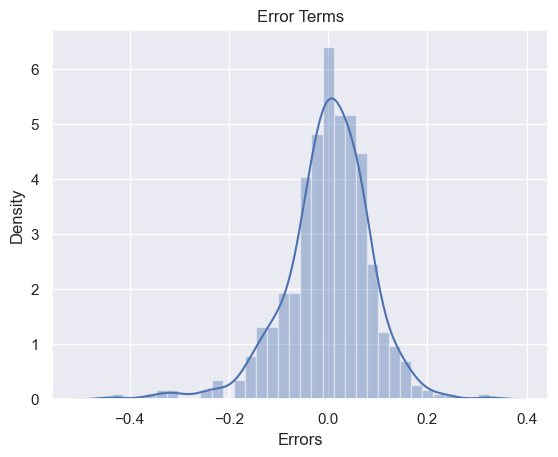

In [56]:
# Plot the histogram of the error terms
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')                  
plt.xlabel('Errors')  
plt.show()

Observations: Everything seem to be fine here. errors are normally distributed and mean is zero.

Checking error terms are dependent or independent

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

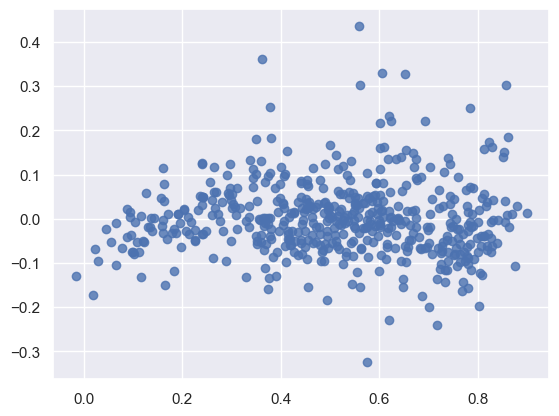

In [59]:
residual= y_train_pred - y_train 
sns.regplot(x= y_train_pred, y=residual)
plt.title("Residual and Predicted values")
plt.xlabel("Predicted value")
plt.ylabel("Residual")
plt.show()

homoscedasticity of error terms

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

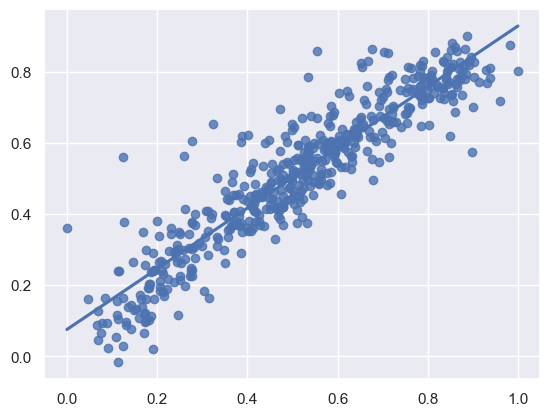

In [77]:
sns.regplot(x= y_train, y=y_train_pred)
plt.title("Residual and Predicted values")
plt.xlabel("y_train")
plt.ylabel("y_train_pred")
plt.show()

Making Predictions Using the Final Model

In [61]:
num_vars =['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
X_test_sm = X_test[col]

In [64]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test_sm)

In [67]:
#predicting test values
y_pred = est.predict(X_test)

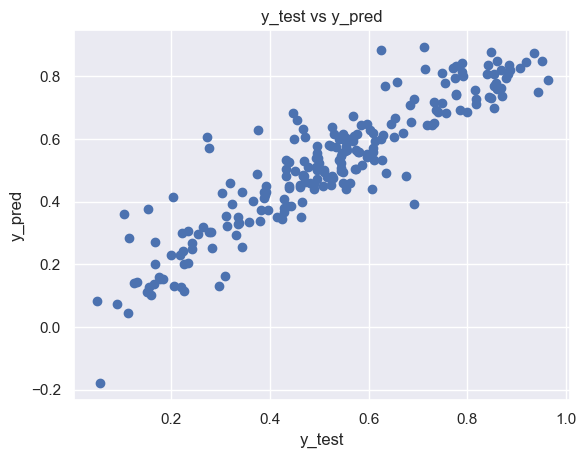

In [68]:
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')
plt.show()

In [69]:
print("r2 score on train data",r2_score(y_train, y_train_pred))# - y_train 

r2 score on train data 0.8528429664095881


In [70]:
from sklearn.metrics import r2_score
print("r2score on test data",r2_score(y_test, y_pred))

r2score on test data 0.8283138102633683


In [71]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.76
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          7.47e-181
Time:                        20:44:34   Log-Likelihood:                 527.86
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     482   BIC:                            -874.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
yr                    0.2330      0.00

Final model:

In [73]:
#r2 socreo test data
print("r2score on test data",r2_score(y_test, y_pred))

r2score on test data 0.8283138102633683


Model Interpretation 

1. yr - A coefficient value of 0.2330 indicates thats the demand for bike hiring increases every year. Which means that people are going into bike riding every year.

2. temp - The rise in temperature the demand for the bike also increases. A coefficient value of 0.3862 indicates that a unit increase in the temp variable increases the bike hire by 0.3862 units.

3. holiday - A coefficient of 0.2549 indicates that bike hire increases during the holidays. 

4. windspeed - The bike demand may fall if the wind speed is high. a coffficient of -0.1838 tells us that there is negative relationship between bike hire and windspeed.

5. Season_spring - The bike demand may fall during the spring season. A coefficient of -0.0455 indicates to us that there is a negative relationship. 

6. Mnth:- Durign the month From December to February there is an negative relationship between with bike hiring. Which mean that less people go for bike riding during these months. Same is the case for Mnth_July.

7. Weekday : - The above results indicates a possitive relationship between bike hirimng and weekend (Weekday_saturday & weekday_sunday). However, from Monday as people go back to work, we see a negative relationship with bike hiring. We can also see bike hiring starting to pickup from Thursday heading towards the weekend.

8. weathersit_light & weathersit_mist: - The demand for hiring bike may fall. 

 Recommendations for the company
1. The company should focus on expanding their business during summer & holiodays and weekends. Also, during these period the company can organise/sponsor a bike riding competition. Inorder to encourage more people to hire bikes and to positivly spread the name of the company.

2. The periods of less hires, the compnay can try to reduce the prices thereby making it cheaper for peorple to hire bikes. 

3. The day when there are fewer hires, they could probably use this time to service the bikes without having a business impact.